# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA and LSA. The following information should be reported:

(1) Features (top n-gram phrases) used for topic modeling.

(2) Top 10 clusters for topic modeling.

(3) Summarize and describe the topic for each cluster. 


In [ ]:
# Write your code here
import nltk
nltk.download()




NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all
       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Unzipping corpora/biocreative_ppi.zip.
       | Downloading package brown to /root/nltk_data...
       |   Unzipping corpora/brown.zip.
       | Downloading package brown_tei to /root/nltk_data...
       |   Unzipping corpora/brown_tei.zip.
       | Downloading package cess_cat to /root/nltk_data...
       |   Unzipping corpora/cess_cat.zip.
       | Downloading package cess_esp to /root/nltk_data...
 

True

In [ ]:
import pandas as pd
url = 'https://github.com/sudheendra14/INFO-5731-Assignement-3/blob/main/training-data.xls'
df = pd.read_csv(url, error_bad_lines=False)

b'Skipping line 77: expected 1 fields, saw 2\nSkipping line 96: expected 1 fields, saw 230\nSkipping line 97: expected 1 fields, saw 2\nSkipping line 112: expected 1 fields, saw 3\nSkipping line 159: expected 1 fields, saw 3\nSkipping line 171: expected 1 fields, saw 6\nSkipping line 178: expected 1 fields, saw 6\nSkipping line 203: expected 1 fields, saw 4\nSkipping line 207: expected 1 fields, saw 2\nSkipping line 220: expected 1 fields, saw 2\nSkipping line 221: expected 1 fields, saw 2\nSkipping line 227: expected 1 fields, saw 2\nSkipping line 230: expected 1 fields, saw 2\nSkipping line 238: expected 1 fields, saw 4\nSkipping line 244: expected 1 fields, saw 2\nSkipping line 249: expected 1 fields, saw 2\nSkipping line 250: expected 1 fields, saw 2\nSkipping line 251: expected 1 fields, saw 2\nSkipping line 252: expected 1 fields, saw 2\nSkipping line 253: expected 1 fields, saw 2\nSkipping line 259: expected 1 fields, saw 2\nSkipping line 260: expected 1 fields, saw 2\nSkipping 

In [ ]:
import re
import numpy as np
import pandas as pd
from pprint import pprint
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from nltk.tokenize import RegexpTokenizer
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [ ]:
tokenizer = RegexpTokenizer(r'\w+')
for i in df['Cleaned_text']:
    # clean and tokenize document string
    raw = i.lower()
    if(i=='spoiler content'):
      continue
    texts.append(tokenizer.tokenize(raw))

KeyError: ignored

In [ ]:
bigram = gensim.models.Phrases(texts, min_count=5, threshold=100) # higher threshold fewer phrases
trigram = gensim.models.Phrases(bigram[texts], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

NameError: ignored

In [ ]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [ ]:
data_words_bigrams = make_bigrams(texts)
data_words_trigrams=make_trigrams(data_words_bigrams)

In [ ]:
#1.1 Features Used for Topic modelling
from collections import Counter
as_words=[]
for k in data_words_trigrams:
  for m in k:
    as_words.append(m)
matching = [s for s in as_words if "_" in s]
Counter(matching)
Counter({'comic_book': 32,
         'de_niro': 2,
         'edge_seat': 6,
         'heath_ledger': 16,
         'king_comedy': 8,
         'mental_health': 12,
         'mental_illness': 16,
         'prince_crime': 6,
         'robert_de_niro': 6,
         'taxi_driver': 22,
         'todd_phillips': 18})

In [ ]:
id2word = corpora.Dictionary(data_words_trigrams)

#Corpus is data_words_trigrams
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_words_trigrams]

In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_trigrams, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

In [ ]:
pip install pyLDAvis

     |████████████████████████████████| 1.7MB 6.6MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 9.9MB 34.9MB/s 
     |████████████████████████████████| 15.3MB 284kB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-cp37-none-any.whl size=136870 sha256=cb1ec83a954c8dd087143a07ba969fd80a6fa2d87e8cceb4d8b2d605ae493f34
  Stored in directory: /root/.cache/pip/wheels/a0/9c/fc/c6e00689d35c82cf96a8adc70edfe7ba7904374fdac3240ac2
Successfully built pyLDAvis
ERROR: tensorflow 2.4.1 has requirement numpy~=1.19.2, but you'll have numpy 1.20.2 which is incompatible.
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0", but you'll have pandas 1.2.4 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0

In [ ]:
from pyLDAvis import gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


ImportError: ignored

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

(1) Features used for sentiment classification and explain why you select these features.

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. 

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9. 

In [ ]:
# Write your code here
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification





In [ ]:
np.random.seed(500)

In [ ]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(df['Cleaned_text'],df['sentiment'],test_size=0.2) #20 percent test data and remaining for training

In [ ]:
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)
Tfidf_vect = TfidfVectorizer(ngram_range=(1,2),max_features=500)   #Here selected top 1000 1-gram and 2-gram features 
#Tfidf_vect = TfidfVectorizer(max_features=1000)
Tfidf_vect.fit(df['Cleaned_text'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

In [ ]:
print(list(Tfidf_vect.vocabulary_.keys())[:500]) #Features selected for classification

In [ ]:
# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_NB = Naive.predict(Test_X_Tfidf)
target_names = ['Positive', 'Negative', 'Neutral']
print(classification_report(Test_Y, predictions_NB,target_names=target_names))

In [ ]:
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
print(classification_report(Test_Y, predictions_SVM,target_names=target_names))

True Positives (TP) - These are the correctly predicted positive values which means that the value of actual class is yes and the value of predicted class is also yes.

True Negatives (TN) -These are the correctly predicted negative values which means that the value of actual class is no and value of predicted class is also no.

False Positives (FP) – When actual class is no and predicted class is yes.

False Negatives (FN)- When actual class is yes but predicted class in no.

Accuracy - Accuracy is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations. Accuracy = TP+TN/TP+FP+FN+TN

Accuracy in NB classifier-75%

Accuracy in SVM classifier-80%

Precision - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations.

Precision in NB classifier-Positive-100%,Negative-100%,Neutral-67%

Precision in SVM classifier-Positive-86%,Negative-100%,Neutral-75%

Recall (Sensitivity) - Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes.

Recall = TP/TP+FN

Recall in NB classifier -Positive-57% Negative-33% Neutral-100%

Recall in SVM classifier-Positive-86% Negative-33% Neutral-90%

F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account.

F1 Score = 2(Recall Precision) / (Recall + Precision)

F1 Score in NB classifier -Positive-73% Negative-50% Neutral-80%

F1 Score in SVM classifier-Positive-86% Negative-50% Neutral-82%

For the above Data, SVM model suits more for classification when compared with Naive bayes.

# **Question 3: House price prediction**

(40 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download here: https://github.com/unt-iialab/info5731_spring2021/blob/main/assignment/assignment4-question3-data.zip. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878. 


In [ ]:
# Write your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
import pandas as pd
test=pd.read_csv('/content/test.csv')
train=pd.read_csv('/content/train.csv')

In [ ]:
!pip install -U pandas-profiling

Requirement already up-to-date: pandas-profiling in /usr/local/lib/python3.7/dist-packages (2.11.0)


In [ ]:
train.head()

AttributeError: ignored

   Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0   1          60       RL  ...        WD         Normal    208500
1   2          20       RL  ...        WD         Normal    181500
2   3          60       RL  ...        WD         Normal    223500
3   4          70       RL  ...        WD        Abnorml    140000
4   5          60       RL  ...        WD         Normal    250000

[5 rows x 81 columns]

In [ ]:
test.head()

AttributeError: ignored

     Id  MSSubClass MSZoning  ...  YrSold  SaleType SaleCondition
0  1461          20       RH  ...    2010        WD        Normal
1  1462          20       RL  ...    2010        WD        Normal
2  1463          60       RL  ...    2010        WD        Normal
3  1464          60       RL  ...    2010        WD        Normal
4  1465         120       RL  ...    2010        WD        Normal

[5 rows x 80 columns]

In [ ]:
train.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

In [ ]:
train.describe()

AttributeError: ignored

                Id   MSSubClass  ...       YrSold      SalePrice
count  1460.000000  1460.000000  ...  1460.000000    1460.000000
mean    730.500000    56.897260  ...  2007.815753  180921.195890
std     421.610009    42.300571  ...     1.328095   79442.502883
min       1.000000    20.000000  ...  2006.000000   34900.000000
25%     365.750000    20.000000  ...  2007.000000  129975.000000
50%     730.500000    50.000000  ...  2008.000000  163000.000000
75%    1095.250000    70.000000  ...  2009.000000  214000.000000
max    1460.000000   190.000000  ...  2010.000000  755000.000000

[8 rows x 38 columns]

In [ ]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

NameError: ignored

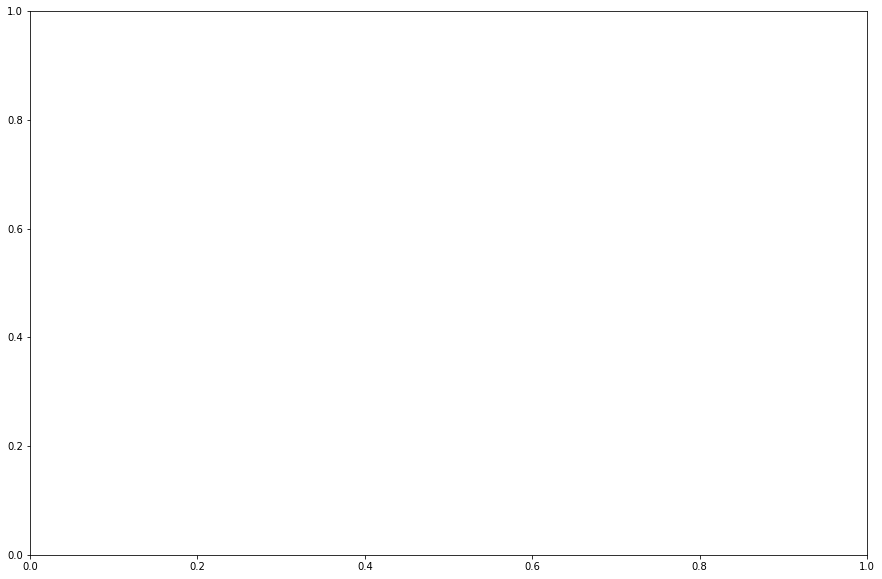

In [ ]:
orr = train.corr()
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values)
plt.title('Heatmap of Correlation Matrix')

In [ ]:
#correlation matrix for the highly correlated variables
new_cols = list(corr.SalePrice[(corr.SalePrice > 0.6)].index.values)
new_corr = train[new_cols].corr()
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(new_corr, annot=True,xticklabels=new_corr.columns.values,yticklabels=new_corr.columns.values)
plt.title('Heatmap of new Correlation Matrix')

NameError: ignored

In [ ]:
#pairplot for all the highly correlated variables and SalePrice
sns.set()
sns.pairplot(train[new_cols], size=2.5)

NameError: ignored

Exploratory Data Analysis-

Here we have plotted higly corelated numerical features to have a better understanding of their relationship with the SalePrice.

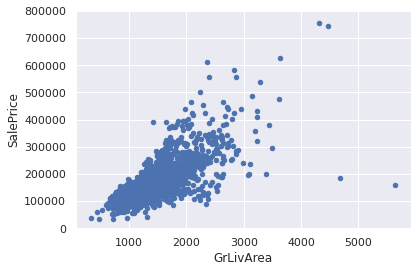

In [ ]:
data = pd.concat([train['SalePrice'], train['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000))

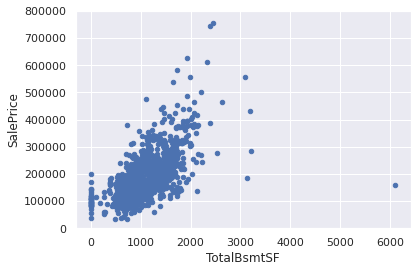

In [ ]:
data = pd.concat([train['SalePrice'], train['TotalBsmtSF']], axis=1)
data.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0,800000))

(-0.5, 9.5, 0.0, 800000.0)

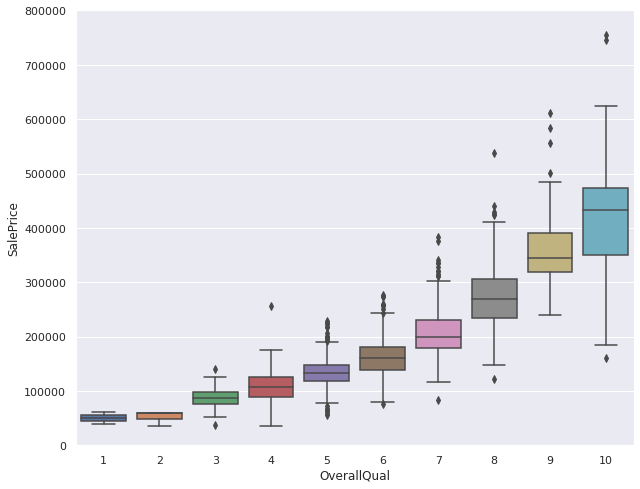

In [ ]:
data = pd.concat([train['SalePrice'], train['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text major ticklabel objects>)

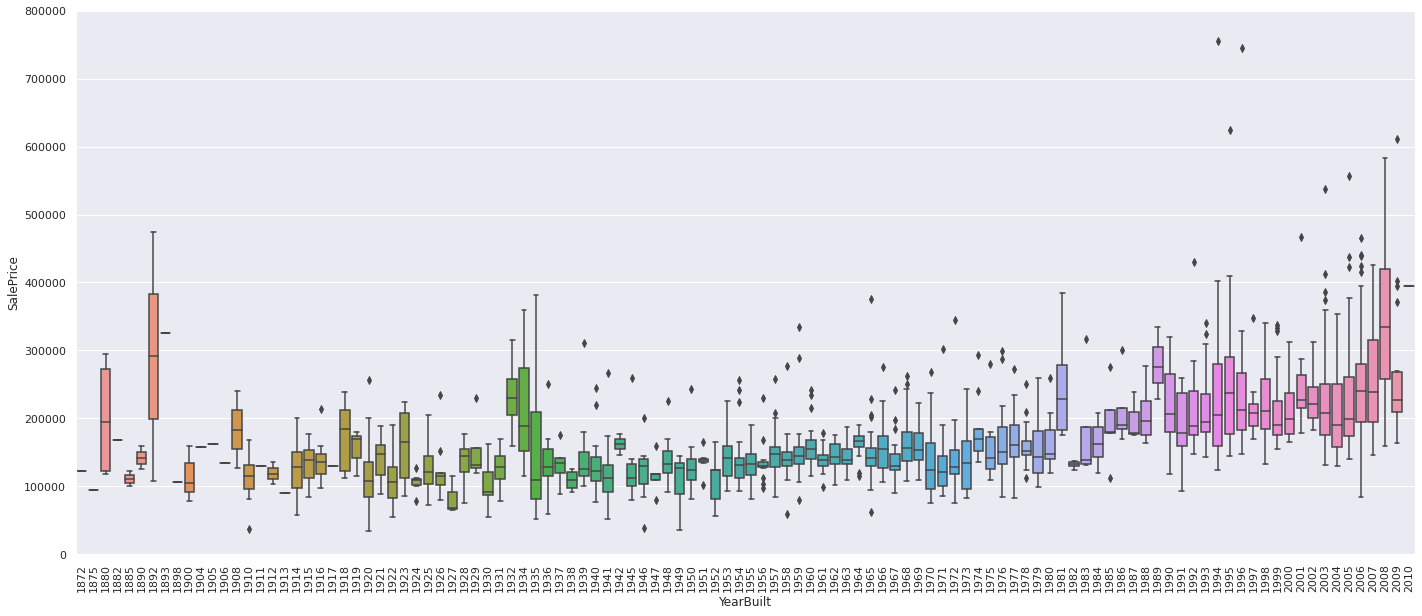

In [ ]:
data = pd.concat([train['SalePrice'], train['YearBuilt']], axis=1)
f, ax = plt.subplots(figsize=(24, 10))
fig = sns.boxplot(x='YearBuilt', y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)

In [ ]:
#Preprocessing
#univariate analysis
from sklearn.preprocessing import StandardScaler
# standardizing data
saleprice_scaled = StandardScaler().fit_transform(train['SalePrice'][:,np.newaxis])
#Low and high ranges of our newly scaled data
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]

print('\nouter range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)


outer range (low) of the distribution:
[[-1.83870376]
 [-1.83352844]
 [-1.80092766]
 [-1.78329881]
 [-1.77448439]
 [-1.62337999]
 [-1.61708398]
 [-1.58560389]
 [-1.58560389]
 [-1.5731    ]]

outer range (high) of the distribution:
[[3.82897043]
 [4.04098249]
 [4.49634819]
 [4.71041276]
 [4.73032076]
 [5.06214602]
 [5.42383959]
 [5.59185509]
 [7.10289909]
 [7.22881942]]


Text(0.5, 0, 'GrLivArea')

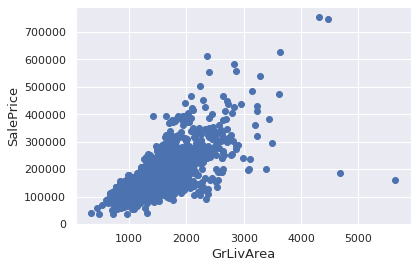

In [ ]:
# bivariate analysis 
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)

Text(0.5, 0, 'GrLivArea')

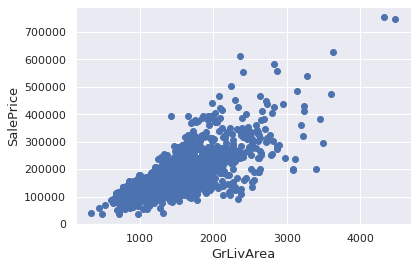

In [ ]:
# Deleting outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)
#check in graph
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)

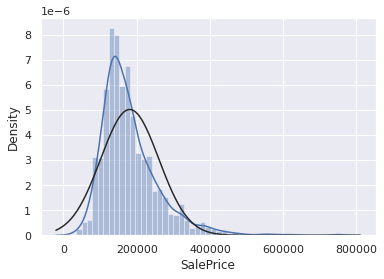

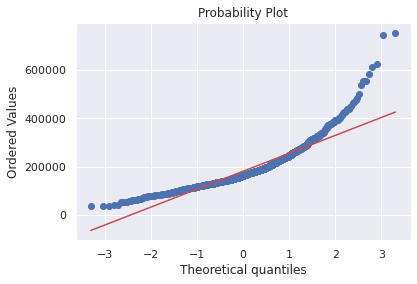

In [ ]:
# histogram and normal probability plot of SalePrice
sns.distplot(train['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

In [ ]:

train['SalePrice'].skew()

1.8812964895244009

In [ ]:
# Applying log transformation 
train['SalePrice'] = np.log1p(train['SalePrice'])

In [ ]:
# Checking the skewness of the SalePrice again
train['SalePrice'].skew()

-0.046234898753481496

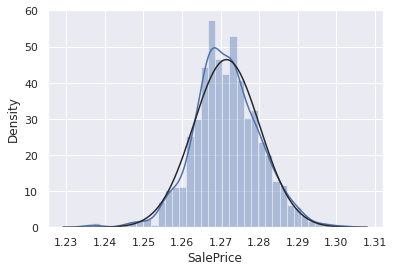

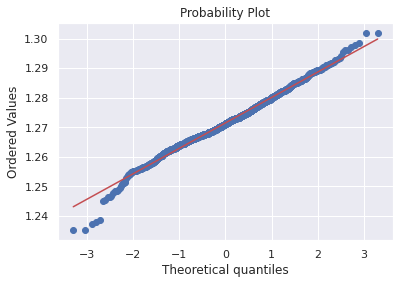

In [ ]:
# transformed histogram and normal probability plot after the log transformation.
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

Data Cleaning-

Here we will concatenate both train and test data perform data cleaning, and then split train and test data.

In [ ]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
all_data.shape

(2917, 80)

In [ ]:
# Missing data
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Percentage' :all_data_na})
missing_data.head(20)

AttributeError: ignored

              Missing Percentage
PoolQC                 99.691464
MiscFeature            96.400411
Alley                  93.212204
Fence                  80.425094
FireplaceQu            48.680151
LotFrontage            16.660953
GarageFinish            5.450806
GarageYrBlt             5.450806
GarageQual              5.450806
GarageCond              5.450806
GarageType              5.382242
BsmtExposure            2.811107
BsmtCond                2.811107
BsmtQual                2.776826
BsmtFinType2            2.742544
BsmtFinType1            2.708262
MasVnrType              0.822763
MasVnrArea              0.788481
MSZoning                0.137127
BsmtFullBath            0.068564

In [ ]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
all_data = all_data.drop(['Utilities'], axis=1)
all_data["Functional"] = all_data["Functional"].fillna("Typ")
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

KeyError: ignored

In [ ]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data_all_data = pd.DataFrame({'Missing Percentage' :all_data_na})
missing_data_all_data.head(20)

AttributeError: ignored

Empty DataFrame
Columns: [Missing Percentage]
Index: []

In [ ]:
#Label Encoding some of the categorical variables that may contain information in their ordering set
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond','ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1','BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope','LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 'YrSold', 'MoSold')
# Applying LabelEncoder to the categorical features
for col in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[col].values)) 
    all_data[col] = lbl.transform(list(all_data[col].values))

In [ ]:
# Adding total sqfootage feature 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']
all_data = pd.get_dummies(all_data)
X_train = all_data[:ntrain]
X_test = all_data[ntrain:]
y_train = train.SalePrice

from sklearn.linear_model import LinearRegression

# Fit Linear Regression on Training Set
LRegression= LinearRegression()
LRegression.fit(X_train, y_train)

# Score linear regression model
LRegression.score(X_train, y_train)

0.9390400721235247

In [ ]:
y_pred = LRegression.predict(X_test)
df = pd.DataFrame({'Predicted Sale value of Houses': y_pred.flatten()})
df

AttributeError: ignored

      Predicted Sale value of Houses
0                           1.264797
1                           1.272353
2                           1.273058
3                           1.275279
4                           1.275419
...                              ...
1454                        1.255807
1455                        1.255405
1456                        1.271867
1457                        1.262452
1458                        1.277461

[1459 rows x 1 columns]